# Q2:

motahare hazrati
400206613

In [2]:
import os 
import gc
import time
import numpy as np
import pandas as pd
from itertools import combinations

from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
sns.set_palette('dark')



A) loading with pandas and showing the last ten

In [4]:
df = pd.read_csv('international_matches.csv')
df.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns', inplace=True)
display(df.tail(10))
del df['date']
del df['home_team_score']
del df['away_team_score']
del df['tournament']
del df['city']
del df['country']
del df['neutral_location']
del df['home_team']
del df['away_team']
del df['home_team_continent']
del df['away_team_continent']
del df['shoot_out']
del df['home_team_goalkeeper_score']	
del df['away_team_goalkeeper_score']
del df['home_team_mean_defense_score']
del df['home_team_mean_offense_score']	
del df['home_team_mean_midfield_score']
del df['away_team_mean_defense_score']
del df['away_team_mean_offense_score']	
del df['away_team_mean_midfield_score']

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,1,UEFA Nations League,Łódź,Poland,True,No,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,2,UEFA Nations League,Zenica,Bosnia and Herzegovina,False,No,Win,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,3,UEFA Nations League,Bucharest,Romania,False,No,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2
23914,2022-06-14,Luxembourg,Faroe Islands,Europe,Europe,94,124,1229,1137,2,2,UEFA Nations League,Luxembourg,Luxembourg,False,No,Draw,69.0,NaN,68.5,NaN,69.8,NaN,NaN,NaN
23915,2022-06-14,Turkey,Lithuania,Europe,Europe,43,138,1461,1092,2,0,UEFA Nations League,İzmir,Turkey,False,No,Win,79.0,71.0,78.2,76.7,78.2,NaN,NaN,NaN
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,1,UEFA Nations League,Chișinău,Moldova,False,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,2,UEFA Nations League,Vaduz,Liechtenstein,False,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,0,Kirin Cup,Suita,Japan,True,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,3,Kirin Cup,Suita,Japan,False,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,1,Friendly,Seoul,Korea Republic,False,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


b) using scatter plot and show it with three dffrent colors

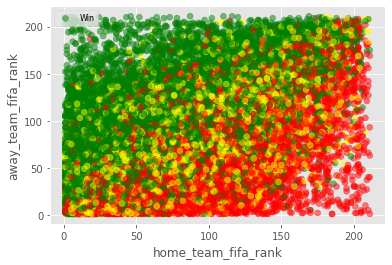

In [11]:
from matplotlib.lines import Line2D
colors = {'Win':'green', 'Draw':'yellow', 'Lose':'red'}

plt.scatter(df['home_team_fifa_rank'], df['away_team_fifa_rank'], c=df['home_team_result'].map(colors), alpha=0.5)
plt.xlabel("home_team_fifa_rank")
plt.ylabel("away_team_fifa_rank")
plt.legend(['Win', 'Draw','Lose'], fontsize=8)
plt.show()

g) eraising  'zero' elemts 

In [12]:
df[(df != 0).all(1)]
df.drop(df[df['home_team_total_fifa_points'] == 0].index, inplace = True)
df=df.reset_index(level=None,drop=True)
display(df)


,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_result
0,114,158,260,112,Win
1,120,129,245,208,Draw
2,108,88,298,364,Win
3,101,98,325,328,Win
4,96,127,338,221,Lose
...,...,...,...,...,...
9626,180,153,932,1040,Win
9627,192,135,895,1105,Lose
9628,28,60,1526,1387,Lose
9629,23,35,1553,1499,Lose


In [14]:
y = (df['home_team_result'] )
x=np.transpose(df)
x.drop('home_team_result',axis=0,inplace=True)
display(x)
print('-------------')
print(y)


0    1    2    3    4    5    6    7    8    9     \
home_team_fifa_rank          114  120  108  101   96  141   92  165  103  177   
away_team_fifa_rank          158  129   88   98  127  183  131  162   95  197   
home_team_total_fifa_points  260  245  298  325  338  179  348  104  311   78   
away_team_total_fifa_points  112  208  364  328  221   56  207  104  340   10   

                            10   11   12   13   14   15   16    17   18    \
home_team_fifa_rank          106  165  183  183  162   57  106     9   22   
away_team_fifa_rank          158  197  197  203  177   15  166    44  120   
home_team_total_fifa_points  307  104   56   56  104  546  307  1016  837   
away_team_total_fifa_points  111   10   10    0   78  918  103   615  245   

                            19   20   21    22   23   24    25   26   27    \
home_team_fifa_rank          112  101   41    51  102   69    76  136   66   
away_team_fifa_rank           37   88   39     4  184  129     8  179   43   
home_team_total_fifa_points  271  325  645   585  319  463   426  193  491   
away_team_total_fifa_points  674  364  655  1176   54  208  1059   74  622   

                            28    29   30   31    32   33   34   35   36    \
home_team_fifa_rank           75   111   79   63     3   36  118  114  116   
away_team_fifa_rank          133     7   88   84    68  172  148  147  149   
home_team_total_fifa_points  430   273  415  521  1329  725  249  260  259   
away_team_total_fifa_points  198  1109  364  387   472   90  146  155  144   

                            37   38   39   40   41   42   43   44   45    \
home_team_fifa_rank           45   53  109   31   32   15   33   56  128   
away_team_fifa_rank           18  131   92   26   14  114  160  119   54   
home_team_total_fifa_points  612  558  292  753  746  918  744  552  211   
away_team_total_fifa_points  888  207  348  806  936  260  105  246  557   

                             46    47   48   49   50   51   52   53   54    \
home_team_fifa_rank           167     1   59   12  103   62   26   65   13   
away_team_fifa_rank            10   203   29  124   87   25   85   20   90   
home_team_total_fifa_points   102  1596  544  942  311  524  805  498  940   
away_team_total_fifa_points  1008     0  784  232  372  807  379  863  358   

                            55    56   57   58   59   60   61    62   63    \
home_team_fifa_rank           23     2  122  110  153   91   24    48  108   
away_team_fifa_rank           86    11  144  172   82  185  126     5   95   
home_team_total_fifa_points  815  1563  239  284  132  354  811   598  298   
away_team_total_fifa_points  374   959  166   90  401   39  227  1174  340   

                            64   65   66   67   68   69   70   71   72   73    \
home_team_fifa_rank           28  117   40   52  197  197   50  133   73  143   
away_team_fifa_rank           60   19  154  188  141  162   35  150   57  107   
home_team_total_fifa_points  791  250  646  581   10   10  589  198  436  168   
away_team_total_fifa_points  530  874  130   35  179  104  729  142  545  305   

                            74   75   76   77   78   79   80   81   82   83    \
home_team_fifa_rank          165  138   55   49   92  125   96  145  104  182   
away_team_fifa_rank          203   15   42  127   34   46   80   83   61   76   
home_team_total_fifa_points  104  191  553  590  347  228  338  163  308   68   
away_team_total_fifa_points    0  918  635  221  738  612  411  393  528  426   

                            84   85   86   87   88   89   90   91    92    \
home_team_fifa_rank          132   69  152   20  104  121   74   85     6   
away_team_fifa_rank           98  140   38   11   47   78  123   26    36   
home_team_total_fifa_points  201  463  139  863  309  242  433  379  1156   
away_team_total_fifa_points  328  181  659  959  601  423  237  805   725   

                            93    94   95   96   97   98   99   100  101   \
home_team_fifa_r

-------------
0        Win
1       Draw
2        Win
3        Win
4       Lose
        ... 
9626     Win
9627    Lose
9628    Lose
9629    Lose
9630     Win
Name: home_team_result, Length: 9631, dtype: object


d)showing the corrolation

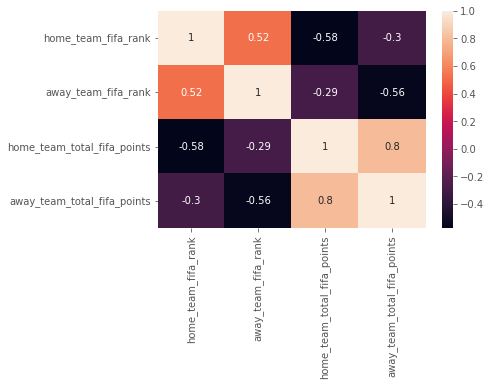

In [13]:
dataplot = sns.heatmap(df.corr(), annot=True)

# making dataset for PyTorch

In [15]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
    def __init__(self, df):
        self.features = df[['home_team_fifa_rank','away_team_fifa_rank','home_team_total_fifa_points','away_team_total_fifa_points']]
        self.labels = df['home_team_result']
        
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        feature = self.features.iloc[idx].to_numpy()
        label_string = self.labels.iloc[idx]
        if label_string == "Win":
            # label = [1,0,0]
            label = 0
        elif label_string == "Draw":
            # label = [0,1,0]
            label = 1
        elif label_string == "Lose":
            # label = [0,0,1]
            label = 2
        label = np.array(label)
        return feature, label

creating the model
accuracy is 57%


In [16]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data.sampler import SubsetRandomSampler
# Create  Model
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super(ANNModel, self).__init__()
        
        # Linear function 1: 4 --> 10
        self.fc1 = nn.Linear(4, 10) 
        # Non-linearity 1
        self.act1 = nn.ReLU()
        
        
        # Linear function 2: 20 --> 20
        self.fc2 = nn.Linear(10, 20)
        # Non-linearity 2
        self.act2 = nn.ReLU()
        # Linear function 2: 20 --> 8
        self.fc3 = nn.Linear(20, 8)
        # Non-linearity 2
        self.act3 = nn.ReLU()

         # Linear function 3: 8 --> 3
        self.fc4 = nn.Linear(8, 3)
        # Non-linearity 3
        self.act4 = nn.Softmax()
        
        
      
    
    def forward(self, x):
      
        x = x.type(torch.float32)
        out = self.fc1(x)
        out = self.act1(out)
        
  
        out = self.fc2(out)
        out = self.act2(out)
        
        out = self.fc3(out)
        out = self.act3(out)

      
        out = self.fc4(out)
      
        
      
        return out

# instantiate ANN
model = ANNModel(4, 3)
# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
#epoch number
num_epochs = 100

dataset = CustomDataset(df=df)
batch_size = 32
validation_split = .25
shuffle_dataset = True
random_seed= 42

# Creating data indices for training and validation splits:
dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
                                           sampler=train_sampler)
validation_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                                sampler=valid_sampler)

for epoch in range(num_epochs):
    for batch_index, (features, labels) in enumerate(train_loader):
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(features)
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for valid_features, valid_labels in validation_loader:
                
                # Forward propagation
                outputs = model(valid_features)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(valid_labels)
                # Total correct predictions
                correct += (predicted == (valid_labels)).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss

            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 1.0961341857910156  Accuracy: 54.46614074707031 %
Iteration: 1000  Loss: 0.8531115055084229  Accuracy: 50.519317626953125 %
Iteration: 1500  Loss: 1.0229636430740356  Accuracy: 57.0835075378418 %
Iteration: 2000  Loss: 0.9732836484909058  Accuracy: 57.45741653442383 %
Iteration: 2500  Loss: 1.0124379396438599  Accuracy: 56.91732406616211 %
Iteration: 3000  Loss: 0.9070513248443604  Accuracy: 56.5849609375 %
Iteration: 3500  Loss: 0.948971152305603  Accuracy: 57.2081413269043 %
Iteration: 4000  Loss: 1.0197606086730957  Accuracy: 57.374324798583984 %
Iteration: 4500  Loss: 0.9938129782676697  Accuracy: 57.78977966308594 %
Iteration: 5000  Loss: 0.919969379901886  Accuracy: 57.00041580200195 %
Iteration: 5500  Loss: 0.7309545874595642  Accuracy: 57.29123306274414 %
Iteration: 6000  Loss: 1.0061005353927612  Accuracy: 55.04777908325195 %
Iteration: 6500  Loss: 0.9433397054672241  Accuracy: 57.955963134765625 %
Iteration: 7000  Loss: 0.693356454372406  Accuracy: 57.08

# Q2: part Z
### **Here is the final result prediction**
Probability of Islamic Republic team winning worldcup 2022 matches

In [ ]:
import torch.nn.functional as nnf
#data was obtained from WWW.FIFA.COM

iran_match=torch.tensor([[20, 16,1565,1627],[5,20,1728,1565],[19,20,1570,1565]])

pred=model(iran_match)
# print(pred)
# torch.argmax(pred[2])

prob = nnf.softmax(pred, dim=1)
print('The Possibility of IRAN winning in  IRN vs USA: {} %'.format(prob[0,0]*100))
print('The Possibility of IRAN winning in  ENG vs IRN: {} %'.format(prob[1,2]*100))
print('The Possibility of IRAN winning in  WLS vs IRN: {} %'.format(prob[2,2]*100))


The Possibility of IRAN winning in  IRN vs USA: 42.033992767333984 %
The Possibility of IRAN winning in  ENG vs IRN: 16.83891487121582 %
The Possibility of IRAN winning in  WLS vs IRN: 23.709796905517578 %
